# Titanic Data Visualisation

This notebook contains data analysis and visualizations of the Titanic passengers dataset.

## Contents
- Exploratory Data Analysis (EDA)
- Basic statistics of passengers
- Feature distributions (Age, Sex, Passenger Class)
- Survival analysis

## Objective
The main goal of this notebook is to demonstrate data analysis and visualization techniques in Python using **Pandas**, **Matplotlib**, and **Seaborn**.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
import plotly.graph_objects as go
%matplotlib inline

df = pd.read_csv("titanic.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


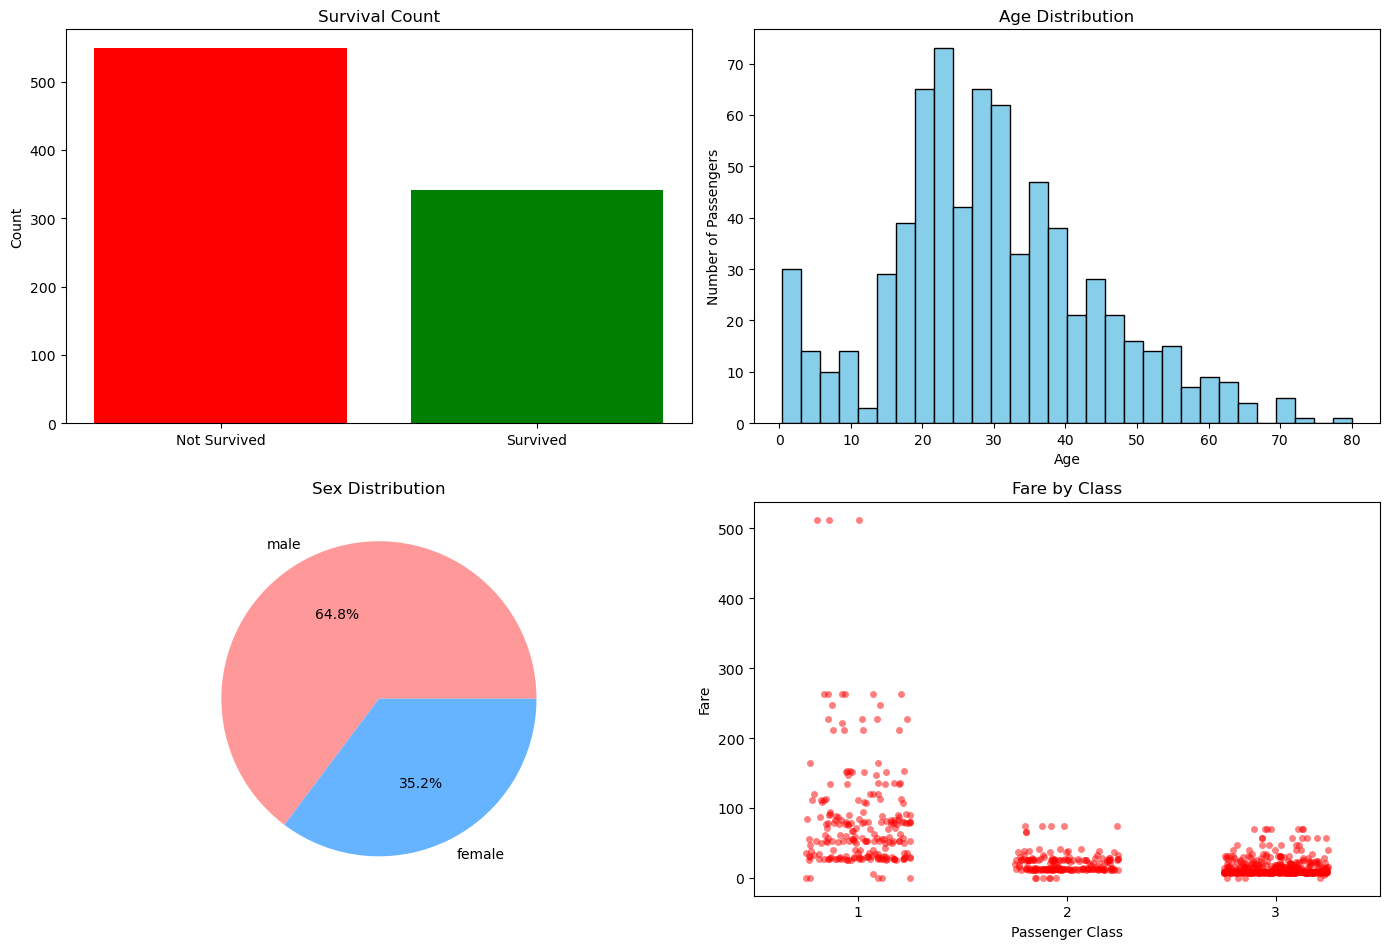

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Survived vs Not Survived
surv_counts = df['Survived'].value_counts()
axes[0,0].bar(surv_counts.index, surv_counts.values, color=['red','green'])
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(['Not Survived','Survived'])
axes[0,0].set_title('Survival Count')
axes[0,0].set_ylabel('Count')

# Age distribution
axes[0,1].hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Number of Passengers')

# Sex distribution pie chart
sex_counts = df['Sex'].value_counts()
axes[1,0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axes[1,0].set_title('Sex Distribution')

axes[1,1].clear()
sns.stripplot(ax=axes[1,1], x='Pclass', y='Fare', data=df, jitter=0.25, size=5, alpha=0.5, color='red')
axes[1,1].set_title('Fare by Class')
axes[1,1].set_xlabel('Passenger Class')
axes[1,1].set_ylabel('Fare')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


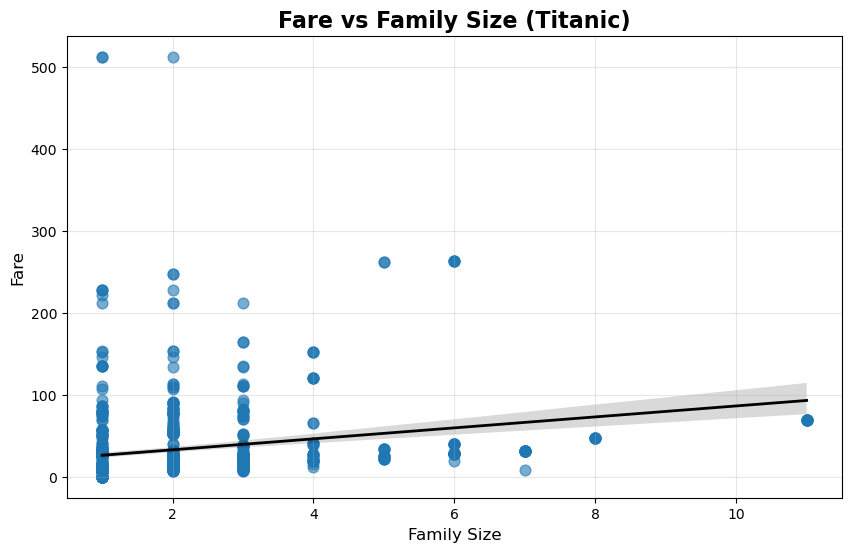

In [43]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(10,6))
sns.regplot(
    x='FamilySize',
    y='Fare',
    data=df,
    scatter_kws={'alpha':0.6, 's':60},  
    line_kws={'color':'black', 'lw':2}
)


plt.title('Fare vs Family Size (Titanic)', fontsize=16, fontweight='bold')
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid(alpha=0.3)

plt.show()


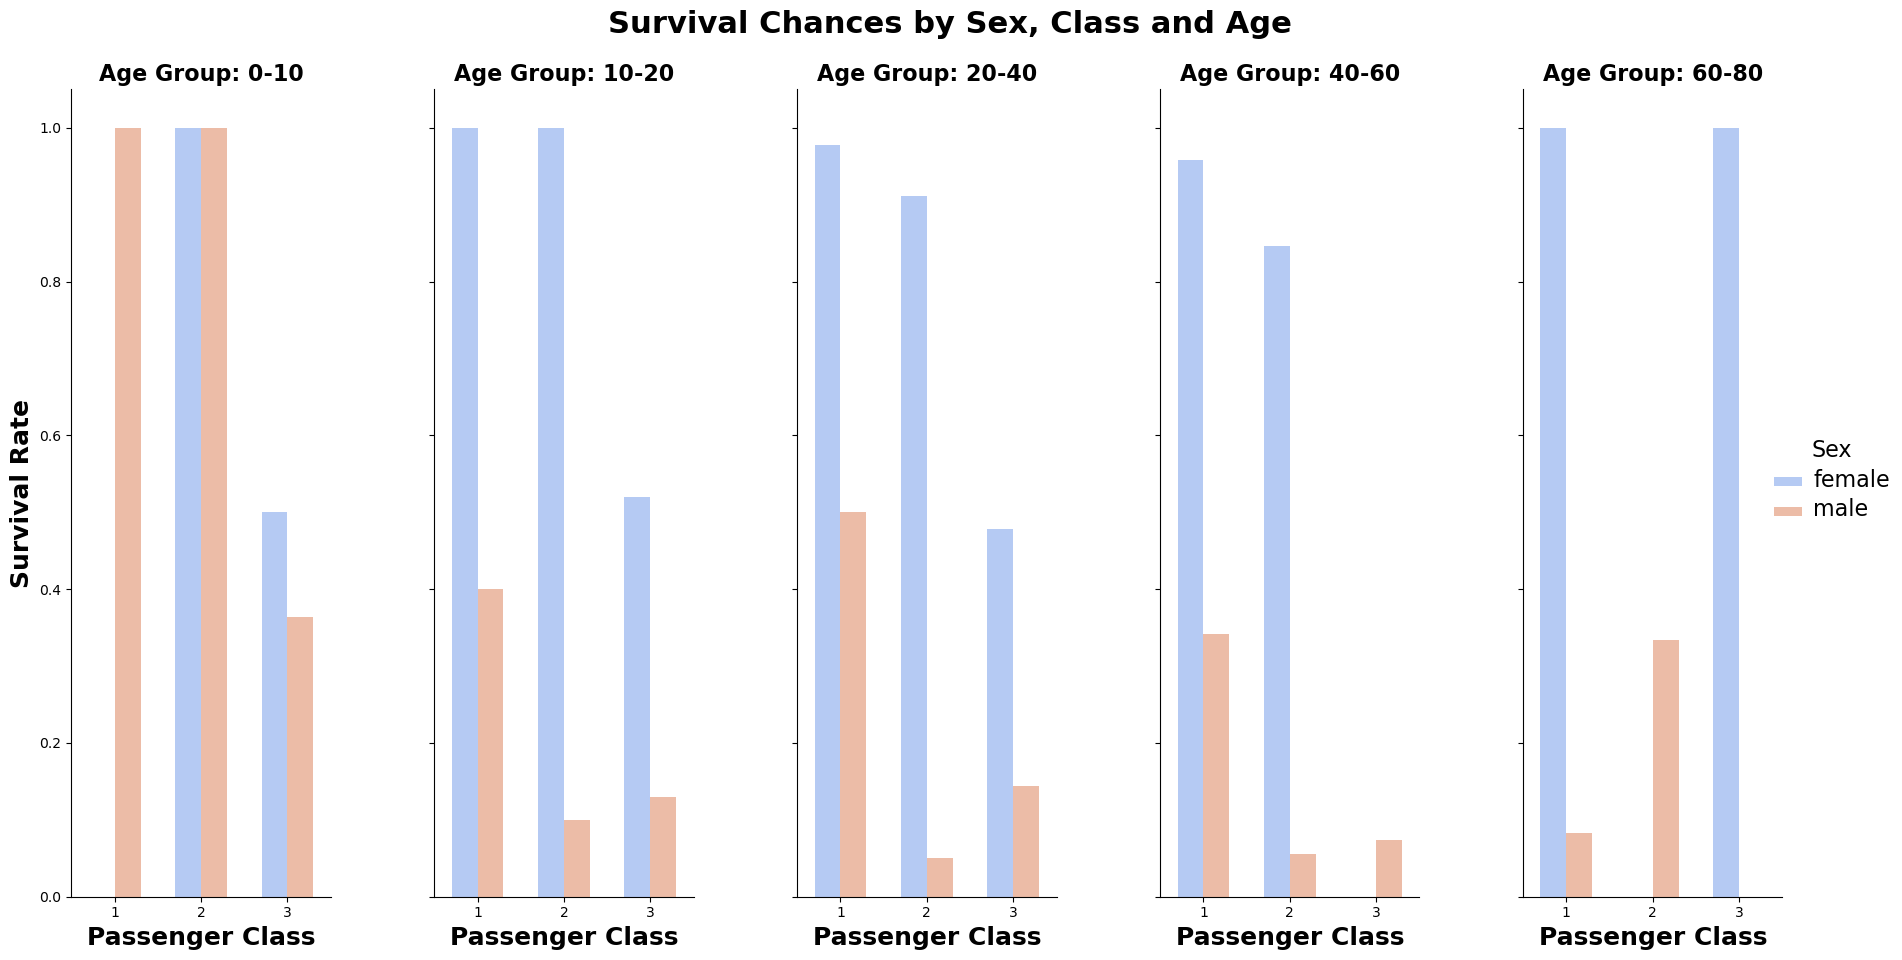

In [78]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,10,20,40,60,80],
                        labels=['0-10','10-20','20-40','40-60','60-80'])

g = sns.catplot(
    data=df,
    x='Pclass', y='Survived',
    hue='Sex', col='AgeGroup',
    kind='bar',
    errorbar=None, palette='coolwarm',
    height=9, aspect=0.4,
    width=0.6,

)

g.set_axis_labels("Passenger Class", "Survival Rate", fontsize=18, fontweight="bold")
g.set_titles("Age Group: {col_name}", size=16, weight="bold")
g._legend.set_title("Sex", prop={'size':16})
for text in g._legend.get_texts():
    text.set_fontsize(16)
g.fig.suptitle("Survival Chances by Sex, Class and Age", fontsize=22, fontweight="bold", y=1.05)
g.fig.subplots_adjust(wspace=0.4)
plt.show()

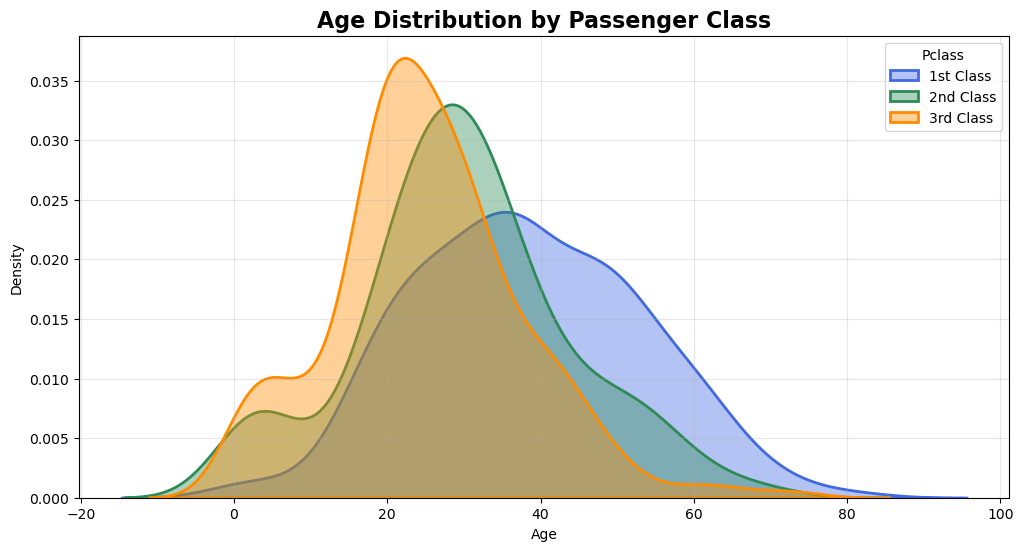

In [35]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df[df['Pclass']==1], x="Age", fill=True, alpha=0.4, linewidth=2, label="1st Class", color="royalblue")
sns.kdeplot(data=df[df['Pclass']==2], x="Age", fill=True, alpha=0.4, linewidth=2, label="2nd Class", color="seagreen")
sns.kdeplot(data=df[df['Pclass']==3], x="Age", fill=True, alpha=0.4, linewidth=2, label="3rd Class", color="darkorange")

plt.title("Age Distribution by Passenger Class", fontsize=16, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Pclass")
plt.grid(alpha=0.3)
plt.show()

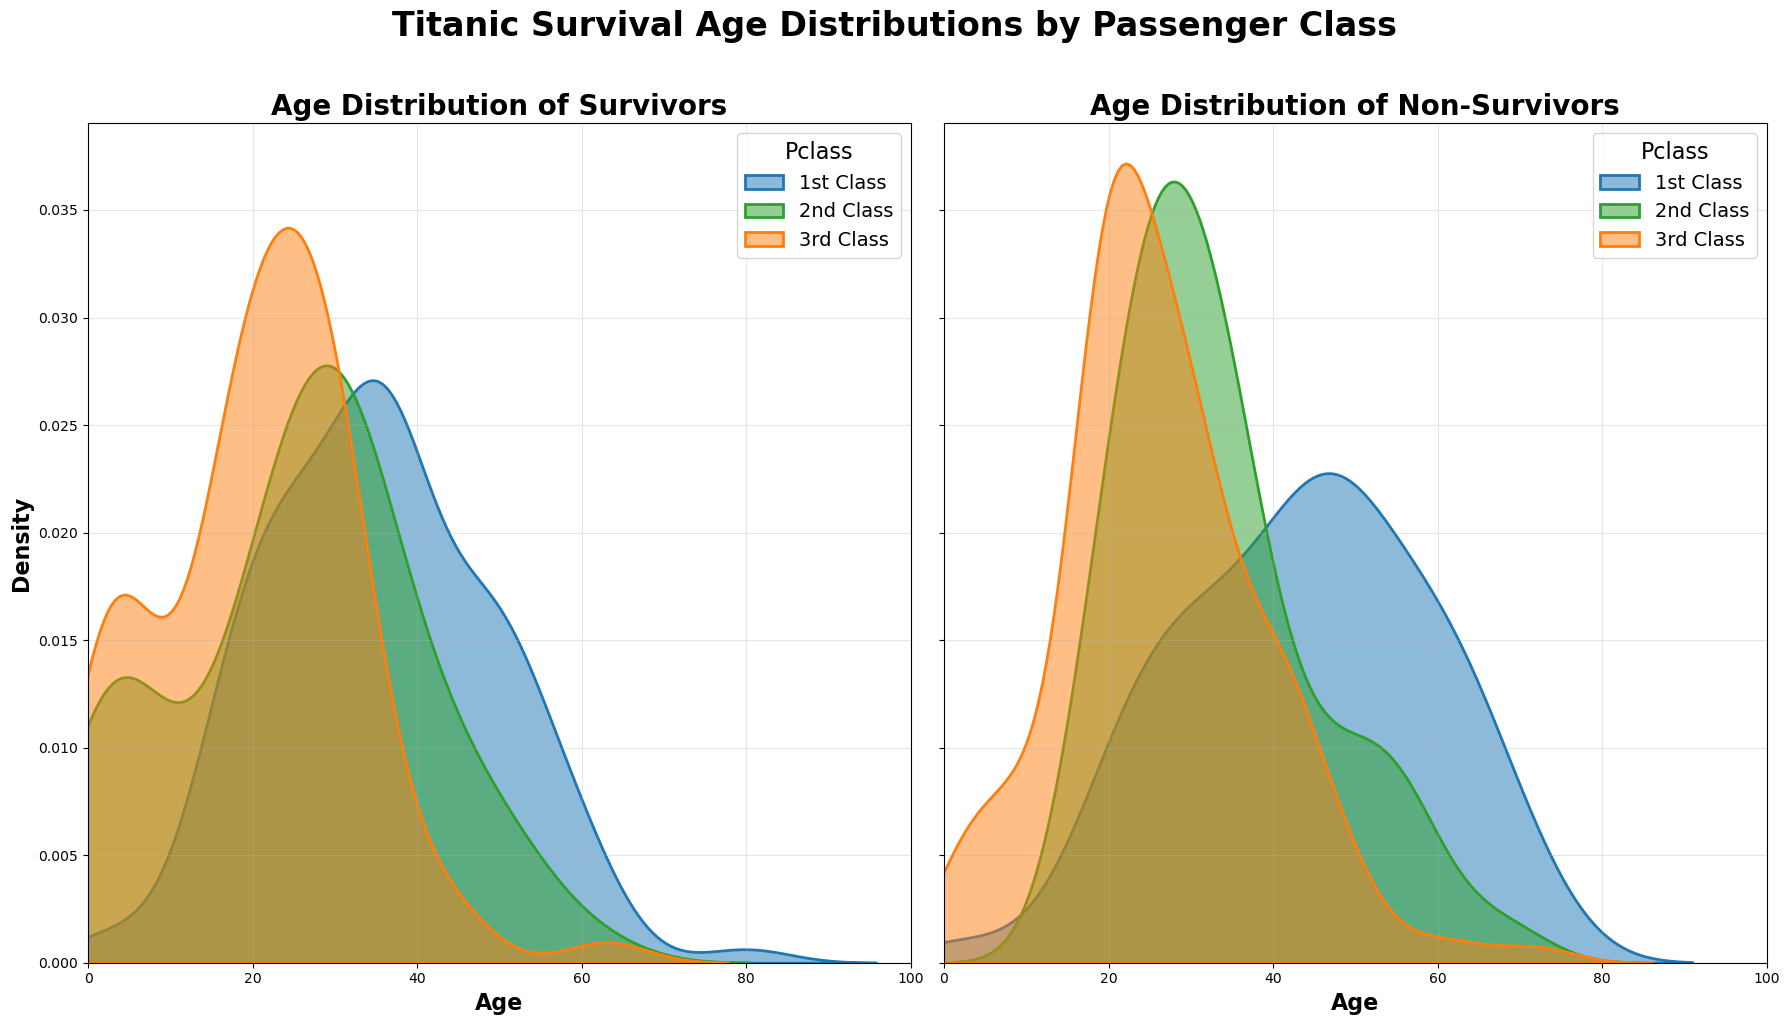

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Jedna wspólna paleta dla obu paneli
colors = {1: "#1f77b4", 2: "#2ca02c", 3: "#ff7f0e"}

fig, axes = plt.subplots(1, 2, figsize=(18,10), sharey=True)

# Survivors
for pclass in [1, 2, 3]:
    sns.kdeplot(
        data=df[(df['Pclass']==pclass) & (df['Survived']==1)],
        x="Age", fill=True, alpha=0.5, linewidth=2,
        label=f"{pclass}st Class" if pclass==1 else f"{pclass}nd Class" if pclass==2 else f"{pclass}rd Class",
        color=colors[pclass], ax=axes[0]
    )
axes[0].set_title("Age Distribution of Survivors", fontsize=20, fontweight="bold")
axes[0].set_xlabel("Age", fontsize=16, fontweight="bold")
axes[0].set_ylabel("Density", fontsize=16, fontweight="bold")
axes[0].set_xlim(0,100)
axes[0].grid(alpha=0.3)
axes[0].legend(title="Pclass", fontsize=14, title_fontsize=16)

# Non-survivors
for pclass in [1, 2, 3]:
    sns.kdeplot(
        data=df[(df['Pclass']==pclass) & (df['Survived']==0)],
        x="Age", fill=True, alpha=0.5, linewidth=2,
        label=f"{pclass}st Class" if pclass==1 else f"{pclass}nd Class" if pclass==2 else f"{pclass}rd Class",
        color=colors[pclass], ax=axes[1]
    )
axes[1].set_title("Age Distribution of Non-Survivors", fontsize=20, fontweight="bold")
axes[1].set_xlabel("Age", fontsize=16, fontweight="bold")
axes[1].set_ylabel("", fontsize=16)
axes[1].set_xlim(0,100)
axes[1].grid(alpha=0.3)
axes[1].legend(title="Pclass", fontsize=14, title_fontsize=16)

plt.suptitle("Titanic Survival Age Distributions by Passenger Class", fontsize=24, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


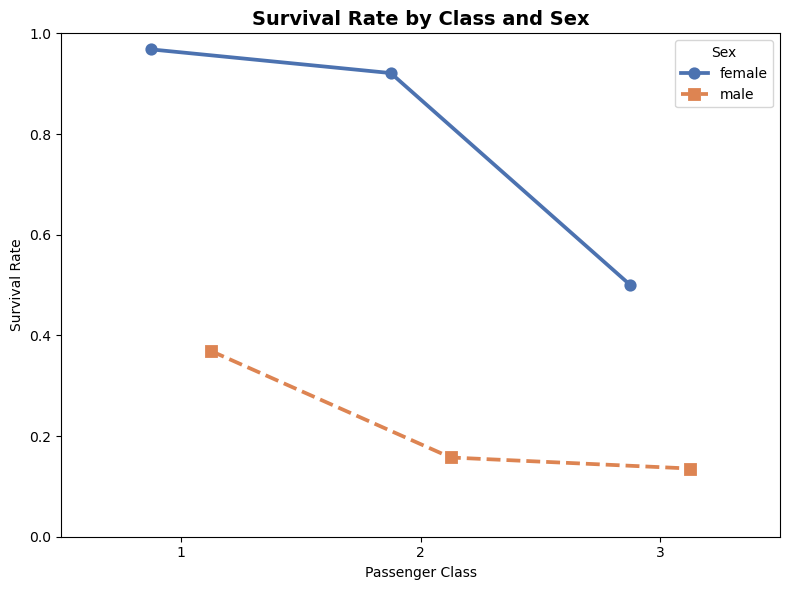

In [38]:
g = (df.groupby(['Pclass','Sex'])['Survived']
       .agg(mean='mean', n='count')
       .reset_index())

plt.figure(figsize=(8,6))
ax = sns.pointplot(
    data=g, x='Pclass', y='mean', hue='Sex',
    dodge=0.25, markers=['o','s'], linestyles=['-','--'],
    palette='deep',
    errorbar=('ci', 95),
    capsize=.12,
    err_kws={'linewidth': 1.8}
)

ax.set_title('Survival Rate by Class and Sex', fontsize=14, fontweight='bold')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate')
ax.set_ylim(0, 1)

for _, row in g.iterrows():
    x = (row['Pclass']-1) + (0.2 if row['Sex']=='male' else -0.2)
    y = row['mean']


plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

<div style="font-size:18px">

- **PassengerId** – passenger identifier  
- **Survived** – survived (1) / did not survived (0)  
- **Pclass** – ticket class (1, 2, 3)  
- **Name** – full name  
- **Sex** – gender  
- **Age** – age  
- **SibSp** – number of siblings/spouses aboard  
- **Parch** – number of parents/children aboard  
- **Ticket** – ticket number  
- **Fare** – ticket fare  
- **Cabin** – cabin number  
- **Embarked** – port of embarkation  

</div>


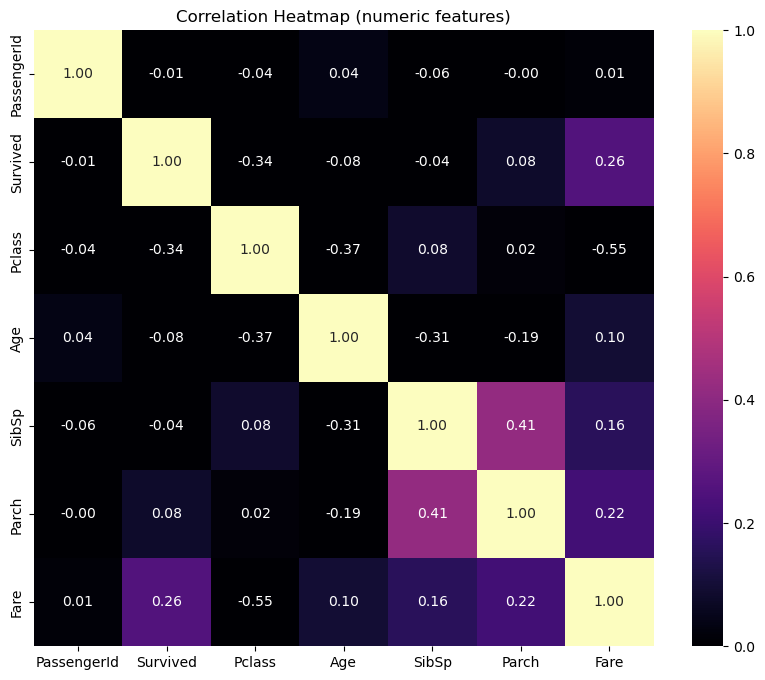

In [3]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="magma", vmin=0, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap (numeric features)")
plt.show()

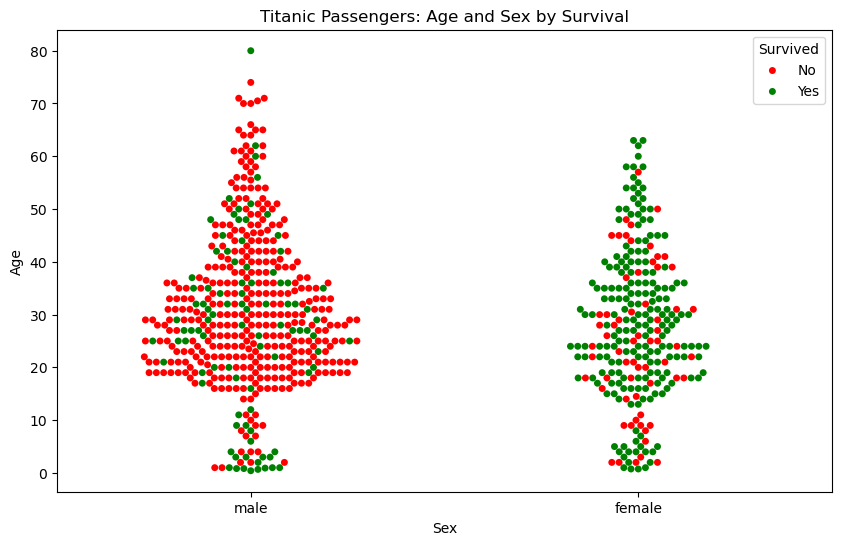

In [4]:

plt.figure(figsize=(10,6))
sns.swarmplot(
    x='Sex',
    y='Age',
    hue='Survived',
    data=df,
    palette={0: "red", 1: "green"},
    size=5
)
plt.title('Titanic Passengers: Age and Sex by Survival')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

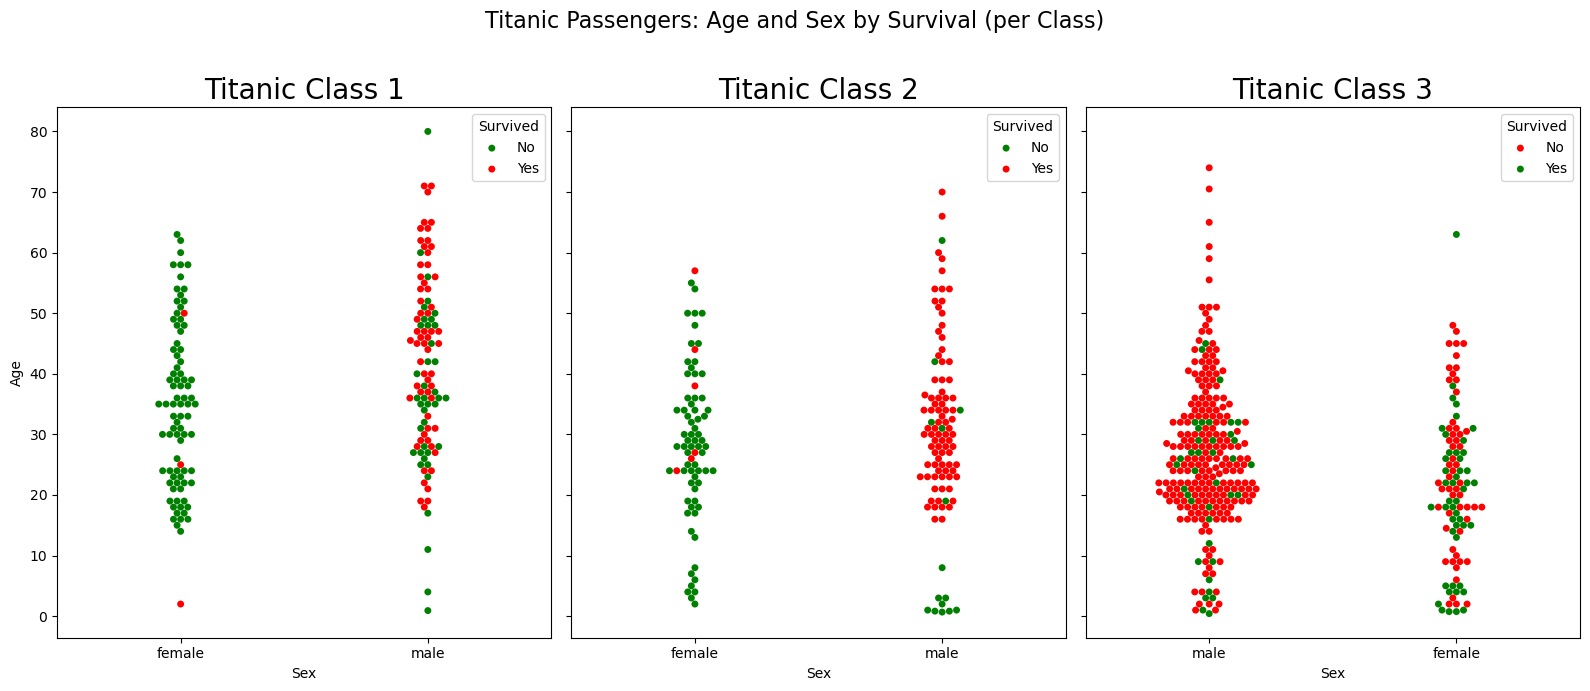

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 7), sharey=True)

classes = [1, 2, 3]

for i, pclass in enumerate(classes):
    sns.swarmplot(
        x='Sex',
        y='Age',
        hue='Survived',
        data=df[df['Pclass'] == pclass],
        palette={0: "red", 1: "green"},
        size=5,
        ax=axes[i]
    )
    axes[i].set_title(f'Titanic Class {pclass}', fontsize=20)
    axes[i].set_xlabel('Sex')
    if i == 0:
        axes[i].set_ylabel('Age')
    else:
        axes[i].set_ylabel('')
    axes[i].legend(title='Survived', labels=['No', 'Yes'])

plt.suptitle('Titanic Passengers: Age and Sex by Survival (per Class)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
